In [25]:
from utils import add_noisy, transform_wavelet
from sklearn.metrics import mean_squared_error
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
_IMG_PATH = '../images/lena512.bmp'

In [20]:
discrete_wavelets_mode = ['db2','coif2']

In [41]:
img = cv2.imread(_IMG_PATH)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
list_survey = [] 
for var in range(10,100,5):
    img_noise, noise = add_noisy(img_gray, var**2)
    for mode in discrete_wavelets_mode:
        dict_survey = {}
        dict_survey['mode']=mode
        dict_survey['var_noise'] = var
        y_coeffs = transform_wavelet(img_noise,mode)
        var_noise_est = np.median(np.abs(y_coeffs[-1][-1]))/0.6745
        dict_survey['var_noise_est'] = var_noise_est
        dict_survey['mse'] = (var-var_noise_est)**2
        list_survey.append(dict_survey)

In [48]:
df_survey = pd.DataFrame(list_survey)
# df_survey

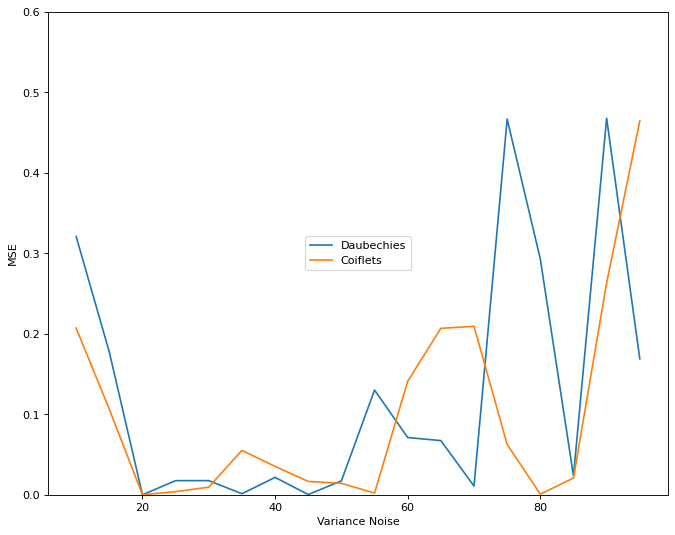

In [46]:
mse_db = df_survey[df_survey['mode']=='db2']['mse']
mse_coif = df_survey[df_survey['mode']=='coif2']['mse']

plt.figure(figsize=(10, 8), dpi=80)
plt.ylim(0,0.6)
plt.plot(range(10,100,5),mse_db)
plt.plot(range(10,100,5),mse_coif)
plt.legend(['Daubechies','Coiflets'], loc='center')
plt.xlabel('Variance Noise')
plt.ylabel('MSE')
plt.savefig('../outputs/compare_methods_var_noise_estimation.png')
# plt.show()